# Euler Problems

### 1 If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [1]:
import numpy as np
import seaborn as sns

In [2]:
3*((1000//3)//2+1) + ((1000//3)//2)*1002

166833

In [3]:
sum([x for x in range(1001) if x%3 == 0])

166833

In [4]:
1000//3 *3

999

In [5]:
def multiple_sum(n, mx):
    highest_div = mx//n
    if (highest_div)%2 == 0:
        return n*highest_div*(highest_div + 1)/2
    else:
        return n*(highest_div//2 + 1) + n*(highest_div//2)*(highest_div + 1)

In [6]:
multiple_sum(3,10)

18

In [7]:
multiple_sum(3,999) + multiple_sum(5,999) - multiple_sum(15,999)

233168.0

### 2 Sum of all even Fibonacci numbers under 4x10^6

In [8]:
# Define a fibonacci sequence

def fib_lst_gen(n):
    fib_lst = [1,2]
    for i in range(2,n):
        fib_lst.append(fib_lst[i-2] + fib_lst[i-1])
    return fib_lst

In [9]:
fib_lst_gen(10)

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [10]:
def fib_adder(n):
    fib_lst = [1,2]
    for i in range(2,n):
        fib_lst.append(fib_lst[i-2] + fib_lst[i-1])
    print(fib_lst_gen(n))
    return sum(fib_lst)

In [11]:
fib_adder(11)

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


375

In [12]:
def even_fib_adder(limit=4e6):
    sm = 10 
    fe_2 = 2
    fe_1 = 8
    
    while True:
        fen = fe_2 + 4*fe_1
        if fen > limit:
            return sm
        sm += fen
        fe_2, fe_1 = fe_1, fen        
    

In [13]:
even_fib_adder()

4613732

### The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [14]:
int(np.sqrt(10))

3

In [15]:
prime_lst = []

for i in range(2,int(np.sqrt(13195))):
    if 13195%i == 0:
        prime_lst.append(i)

In [16]:
# Doesn't work! 5*7, 5*13... have crept in

prime_lst

[5, 7, 13, 29, 35, 65, 91]

In [17]:
def highest_prime_factor(n):
    prime_factor = 1
    i = 2

    # run while i is less than the sqrt of n
    while i <= n/i:
    #     if i is a factor of n set the prime_factor equal to i
    #     update n to be n divided by i (as we are looking for prime factors of n/i now)
        if n % i == 0:
            prime_factor = i
            n /= i
        else:
            i += 1

    # If we have exited the while loop i can no longer be less than sqrt(n)
    # The number we are now checking (really n/i/i/i... for as many prime factors as we've found) is the largest prime
    prime_factor = n
    return prime_factor

In [18]:
highest_prime_factor(600851475143)

6857.0

### 4 A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

In [19]:
999*901

900099

In [20]:
def pal_6(n):
    n = str(n)
    return n[0:3] == n[6:2:-1]

In [21]:
pal_6(203102)

False

In [22]:
high_fact = []
for i in range(900,1000):
    for j in range(900,1000):
        if pal_6(i*j):
            high_fact.append((i,j))
pal_lst = [i*j for i,j in high_fact]

In [23]:
max(pal_lst)

906609

### 5 2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

In [24]:
prime_lst_under20 = []

for num in range(2,21):
    if all(num%i!=0 for i in range(2,int(np.sqrt(num))+1)):
        prime_lst_under20.append(num)

In [25]:
prime_lst_under20

[2, 3, 5, 7, 11, 13, 17, 19]

In [26]:
num = 1
for i in prime_lst_under20:
    num *= i
num *= 3*(2**3)

In [27]:
# Lowest num made of all of the highest powers of the prime factors

num

232792560

In [104]:
# Produce a list of prime factors of a number n

def prime_factorer(n):
    prime_factor = 1
    i = 2
    prime_factor_lst = []
    
    # run while i is less than the sqrt of n
    while i <= n/i:
    #     if i is a factor of n set the prime_factor equal to i
    #     update n to be n divided by i (as we are looking for prime factors of n/i now)
        if n % i == 0:
            prime_factor = i
            n /= i
            prime_factor_lst.append(i)
        else:
            i += 1

    # If we have exited the while loop i can no longer be less than sqrt(n)
    # The number we are now checking (really n/i/i/i... for as many prime factors as we've found) is the largest prime
    prime_factor = int(n)
    prime_factor_lst.append(prime_factor)
    return prime_factor_lst

In [105]:
# 8*9

prime_factorer(72)

[2, 2, 2, 3, 3]

In [106]:
[prime_factorer(x) for x in range(2,11)]

[[2], [3], [2, 2], [5], [2, 3], [7], [2, 2, 2], [3, 3], [2, 5]]

In [107]:
# Doesnt work for [2,3], [2,5] etc but as we only care about the highest power of a prime factor we can ignore these
# All it does is in the case of [2,3] it adds in another (2,1) which set then gets rid of
# Going from 2 upwards by the time you get to your first mixed factor you must have passed both factors as pure factors

[(x[0], x.count(x[0])) for x in [prime_factorer(x) for x in range(2,11)]]

[(2, 1), (3, 1), (2, 2), (5, 1), (2, 1), (7, 1), (2, 3), (3, 2), (2, 1)]

In [108]:
# Doesn't include any number that has mixed prime factors, such as 6 =2*3

def prime_factor_list(n):
    lst = list(set([(x[0], x.count(x[0])) for x in [prime_factorer(x) for x in range(2,n + 1)]]))
    lst.sort()
    return lst

In [109]:
prime_factor_list(10)

[(2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (5, 1), (7, 1)]

In [110]:
def high_power_multiplier(lst_of_prime_factors):
    """List of prime factors must be given as a list of tuples
    so 16 would be (2,4) ie 2^4
    """
    p_lst = [(1,1)]
    
    for item in lst_of_prime_factors:
        if item[0] == p_lst[-1][0] and item[1] > p_lst[-1][1]:
            p_lst.remove(p_lst[-1])
            p_lst.append(item)
        else:
            p_lst.append(item)
    p_lst = list(set(p_lst))
    return np.prod([i**j for i,j in p_lst])

In [111]:
# Multiplies the set of highest powers of each prime factor
# Here (2^2)(3^1)(5^1)

high_power_multiplier([(2,1),(2,2),(3,1),(2,2),(5,1)])

60

In [112]:
# Weirdly broken, cannot go above 42

high_power_multiplier(prime_factor_list(43))

-9027155914907130016

In [113]:
prime_factor_list(43);

In [114]:
# This is what we should be getting for 44. It's not too big so this seems like it's not an overflow issue??

(2**5)*(3**3)*(5**2)*7*11*13*17*19*23*29*31*37*41*43

9419588158802421600

In [146]:
import time
import timeit

In [171]:
# This is our previous answer so we're good!

j_time = timeit.timeit('high_power_multiplier(prime_factor_list(20))', globals=globals())/(1e6)

In [172]:
j_time

0.00012831400090362877

In [173]:

j_time_lst = [timeit.timeit(f'high_power_multiplier(prime_factor_list({i}))', globals=globals())/(1e6) for i in range(1,40)]


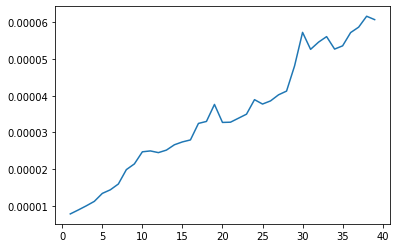

In [177]:
sns.lineplot(x = range(1,40), y = j_time_lst);

In [178]:
def v_meth(up_lim = 20):
    n = up_lim
    l = [i for i in range(2, up_lim + 1)]
    while True:
        for i in l:
            if n % i == 0:
                continue
            elif n % i != 0:
                n = n + 1
                break
        else:
            break
    return n

In [182]:
v_meth(20)

232792560

In [201]:
v_time_lst = [timeit.timeit(f'v_meth({i})', globals=globals(), number=1)/(1) for i in range(1,21)]


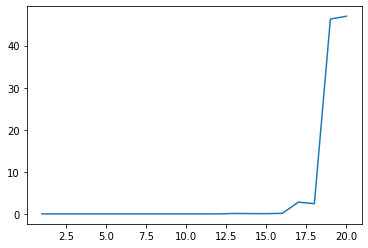

In [203]:
sns.lineplot(x = range(1,21), y = v_time_lst);

In [163]:
# Victors approach

start_time = time.time()

v_meth(20)

v_time = time.time() - start_time
print("--- %s seconds ---" % (v_time))

232792560
--- 63.21571111679077 seconds ---


In [164]:
v_time/j_time

2162997.8491536817

In [184]:
up_lim = 5
n = up_lim
l = [i for i in range(2, up_lim + 1)]
while True:
    for i in l:
        if n % i == 0:
            continue
        elif n % i != 0:
            n = n + 1
            break
    else:
        break
print(n)

60


In [185]:
l

[2, 3, 4, 5]

### 6 Sum of squares

In [38]:
[x**2 for x in range(1,11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [39]:
(sum([x for x in range(1,101)]))**2 -sum([x**2 for x in range(1,101)])

25164150

### 7 10001st prime

In [40]:
import numpy as np

In [41]:
count = 1
highest_prime = 3
num = 3


while count < 10001:
    
    if all(num%i!=0 for i in range(2,int(np.sqrt(num))+1)):
           highest_prime = num
           count += 1
    num += 2

In [42]:

highest_prime

104743

In [43]:
count

10001

### 8 Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [44]:
nm = 7316717653133062491922511967442657474235534919493496983520312774506326239578318016984801869478851843858615607891129494954595017379583319528532088055111254069874715852386305071569329096329522744304355766896648950445244523161731856403098711121722383113622298934233803081353362766142828064444866452387493035890729629049156044077239071381051585930796086670172427121883998797908792274921901699720888093776657273330010533678812202354218097512545405947522435258490771167055601360483958644670632441572215539753697817977846174064955149290862569321978468622482839722413756570560574902614079729686524145351004748216637048440319989000889524345065854122758866688116427171479924442928230863465674813919123162824586178664583591245665294765456828489128831426076900422421902267105562632111110937054421750694165896040807198403850962455444362981230987879927244284909188845801561660979191338754992005240636899125607176060588611646710940507754100225698315520005593572972571636269561882670428252483600823257530420752963450

In [45]:
len(str(nm))

1000

In [46]:
nm_str = str(nm)

In [47]:
# 2 lists so we can check the index

prod_lst = []
adj_lst = []
for i in range(988):
    adj_13 = nm_str[i:i+13]
    prod = 1
    if '0' not in adj_13:
        for i in adj_13:
            prod *= int(i)
        prod_lst.append(prod)
        adj_lst.append(adj_13)

In [48]:
max(prod_lst)

23514624000

In [49]:
adj_lst[prod_lst.index(max(prod_lst))]

'5576689664895'

### 9 There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [99]:
for a in range(1,500):
    for b in range(1,501):
        c = 1000 - a - b
        if a**2 + b**2 == c**2:
            print(a*b*c, a,b)

31875000 200 375
31875000 375 200


### 10 Sum all primes under 2 million

In [211]:
sm = 2
for num in range(3,int(2e6 +1)):
    if all(num%i!=0 for i in range(2,int(np.sqrt(num))+1)):
        sm += num

In [212]:
sm

142913828922